In [136]:
# load required libraries
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

num_features = 36
# label_feature = 'Class'

In [137]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [144]:
import pandas as pd


dataset = pd.read_csv('final.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,Category_id,Category,Customer_id,Tran_id,Contact_no,Email_id
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.133558,-0.021053,149.62,0,1,Platinum,Cust_1,Abcd1,1851450520,cust1@gmail.com
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.008983,0.014724,2.69,0,1,Platinum,Cust_2,Abcd2,8922101656,cust2@gmail.com
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.055353,-0.059752,378.66,0,1,Platinum,Cust_3,Abcd3,6734115547,cust3@gmail.com
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.062723,0.061458,123.50,0,1,Platinum,Cust_4,Abcd4,4842861250,cust4@gmail.com
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.219422,0.215153,69.99,0,1,Platinum,Cust_5,Abcd5,6003219698,cust5@gmail.com


In [138]:
from pandas import read_csv

# Reading in the dataset from CSV file
dataset = read_csv("final.csv", header=0, index_col=0, usecols=range(0, num_features+1))

# If the DataFrame contains only one column, squeeze it into a Series
if len(dataset.columns) == 1:
    series = dataset.squeeze()
else:

    pass


In [148]:
import pandas as pd

# Define anomaly conditions for each category
regalia_anomaly = (dataset['Category'] == 'Regalia') & (dataset['Amount'] > 250)
silver_anomaly = (dataset['Category'] == 'Silver') & (dataset['Amount'] > 350)
gold_anomaly = (dataset['Category'] == 'Gold') & (dataset['Amount'] > 500)
platinum_anomaly = (dataset['Category'] == 'Platinum') & (dataset['Amount'] > 800)

# Combine all anomaly conditions using logical OR
dataset['Anomaly'] = regalia_anomaly | silver_anomaly | gold_anomaly | platinum_anomaly

# Convert True/False to 1/0
dataset['Anomaly'] = dataset['Anomaly'].astype(int)

anomaly_rows = dataset[dataset['Anomaly'] == 1]

print(anomaly_rows)


            Time        V1         V2        V3        V4        V5        V6  \
51          36.0 -1.004929  -0.985978 -0.038039  3.710061 -6.631951  5.122103   
89          59.0 -0.773293  -4.146007 -0.932038  0.027094 -1.698307  0.460188   
140         87.0 -5.101877   1.897022 -3.458034 -1.277543 -5.517758  2.098366   
150         93.0 -1.640014  -0.479831  1.613630  2.997979 -3.803788  5.051812   
164        103.0 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   
...          ...       ...        ...       ...       ...       ...       ...   
284716  172708.0 -1.795049  -1.292762  0.599481 -0.944031  0.787336 -0.640908   
284732  172721.0  1.076175  -3.116353 -2.051439 -0.953189 -1.544838 -1.124645   
284733  172726.0 -1.353026   0.289945  0.173684 -3.780442 -1.173016 -0.159307   
284735  172727.0 -1.661169  -0.565425  0.294268 -1.549156 -2.301359  2.365956   
284753  172743.0  1.465737  -0.618047 -2.851391  1.425282  0.893893 -0.958325   

              V7        V8 

In [146]:
import pandas as pd

# Read the dataset
dataset = pd.read_csv('final.csv')

dataset['Anomaly'] = (dataset['Category'] == 'Silver') & (dataset['Amount'] > 350)

dataset['Anomaly'] = dataset['Anomaly'].astype(int)

# Filter anomalies in the 'Silver' category
silver_anomalies = dataset[(dataset['Category'] == 'Silver') & (dataset['Anomaly'] == 1)]

print(silver_anomalies)

            Time         V1         V2        V3        V4        V5  \
130014   79263.0  -0.847451  -2.945589 -0.852059  2.235333 -1.087355   
130024   79265.0  -0.028713  -2.137497 -1.130026  0.471868 -0.769471   
130028   79267.0  -1.016825  -3.140517 -0.883568  3.234866 -1.094916   
130044   79270.0   0.097944  -2.553640 -1.132631 -0.436802  0.729746   
130046   79270.0  -9.617041 -18.998368 -5.187569  4.344542 -7.393425   
...          ...        ...        ...       ...       ...       ...   
205101  135590.0   0.566742  -3.239704 -1.865361 -1.637002 -0.831041   
205108  135594.0   1.063340  -2.181229 -1.205836 -0.738340 -0.478971   
205125  135601.0 -10.708439   1.781275 -7.133780  0.353786 -2.593760   
205173  135623.0   1.204699  -1.769147 -2.037953  0.788077 -0.319011   
205175  135624.0  -0.910906  -6.089465 -2.480764  0.450255 -2.451513   

              V6        V7        V8        V9  ...       V28   Amount  Class  \
130014 -0.182994  1.701364 -0.447750 -0.245303  ...  0

Text(0, 0.5, 'Frequency')

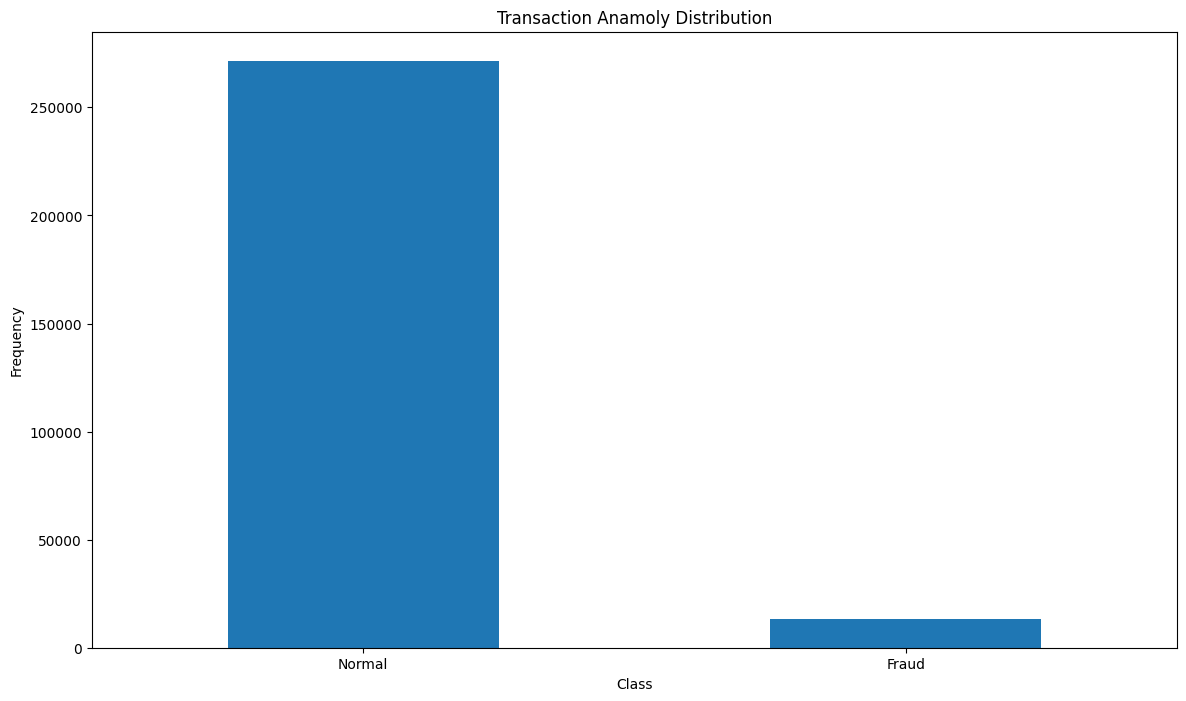

In [149]:
count_classes = pd.value_counts(dataset['Anomaly'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Anamoly Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [150]:
fraud = dataset[dataset['Anomaly']==1]

normal = dataset[dataset['Anomaly']==0]

In [151]:
print("Fraud Cases : {}".format(len(fraud)))
print("Valid Cases : {}".format(len(normal)))

Fraud Cases : 13380
Valid Cases : 271427


In [152]:
fraud.Amount.describe()

count    13380.000000
mean       819.375558
std        798.627037
min        250.070000
25%        401.175000
50%        593.495000
75%        950.822500
max      25691.160000
Name: Amount, dtype: float64

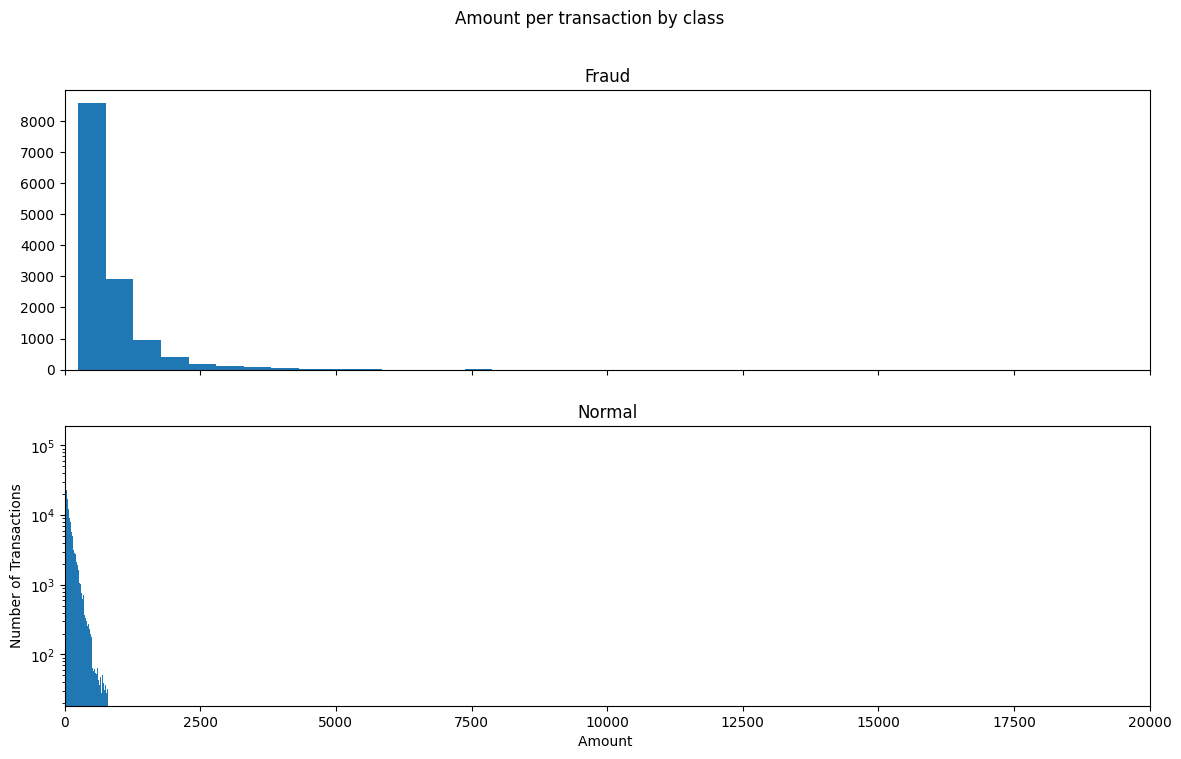

In [156]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

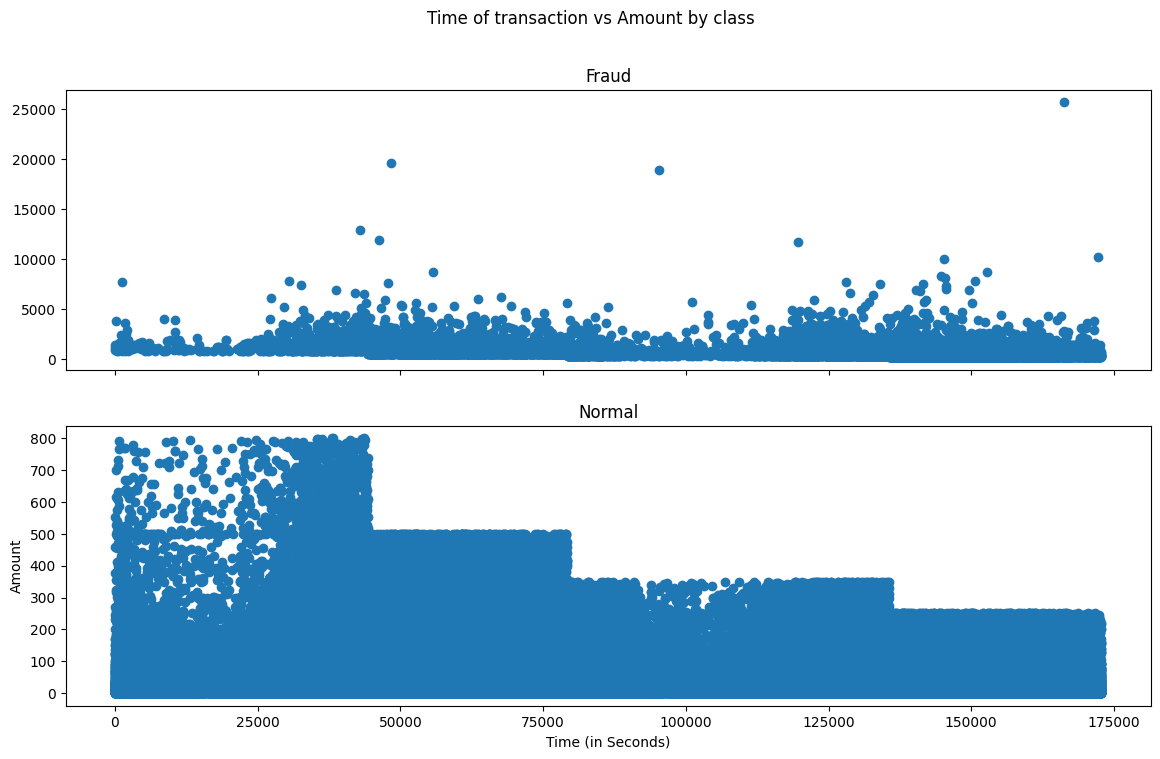

In [157]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [158]:
print(len(fraud))
print(len(normal))
outlier_fraction = len(fraud)/float(len(normal))

13380
271427


In [159]:
print(outlier_fraction)



0.04929502223433925


In [167]:
# ## Correlation
# import seaborn as sns
# #get correlations of each features in dataset
# corrmat = dataset.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# # plot heat map
# g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [160]:
#Create independent and Dependent Features
columns = dataset.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Anomaly"]]
# Store the variable we are predicting 
target = "Anomaly"
# Define a random state 
state = np.random.RandomState(42)
X = dataset[columns]
Y = dataset[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 37)
(284807,)


In [161]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X), 
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, 
                                          max_iter=-1)
}


In [162]:
type(classifiers)

dict

In [186]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Isolation Forest classifier
clf = IsolationForest(contamination=0.005, random_state=42)

clf.fit(X)

y_pred = clf.predict(X)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Calculate the number of errors
n_errors = (y_pred != Y).sum()

# Print the desired output
print("Isolation Forest:", n_errors)
print("Accuracy Score:")
print(accuracy_score(Y, y_pred))
print("Classification Report:")
print(classification_report(Y, y_pred))


Isolation Forest: 13847
Accuracy Score:
0.9513811107170821
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    271427
           1       0.34      0.04      0.06     13380

    accuracy                           0.95    284807
   macro avg       0.65      0.52      0.52    284807
weighted avg       0.93      0.95      0.93    284807



In [178]:
pip install --upgrade scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


In [185]:

from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from ..externals._arff import ArffSparseDataType
from pandas import pd_fillna
from ..utils import (
    _chunk_generator,
    check_pandas_support,
    get_chunk_n_rows,
)

# Generate example data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Local Outlier Factor model on the training data
lof = LocalOutlierFactor(novelty=True)
lof.fit(X_train)

# Predict anomalies on the test data
y_pred = lof.predict(X_test)
# Anomalies are labeled as -1 and inliers as 1

# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Inliers', 'Anomalies'])

print("Accuracy Score: ", accuracy)
print("Classification Report:")
print(classification_rep)


ImportError: cannot import name 'pd_fillna' from 'sklearn.utils.fixes' (C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\utils\fixes.py)

In [114]:
import threadpoolctl
threadpoolctl.threadpool_limits()
